# 04.11.04 Logistic regression

### Load data

In [1]:
# import commands
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the train features npz file
with np.load("train_features.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_features=tr["tr_features"]

In [3]:
# Load the train batch npz file
with np.load("train_batch.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_batch_imgs=tr["tr_batch_imgs"], 
    tr_batch_labels=tr["tr_batch_labels"]

In [4]:
# Load the test features npz file
with np.load("test_features.npz", allow_pickle=False) as te:
    # Load the arrays
    te_features=te["te_features"]

In [5]:
# Load the test batch npz file
with np.load("test_batch.npz", allow_pickle=False) as te:
    # Load the arrays
    te_batch_imgs=te["te_batch_imgs"], 
    te_batch_labels=te["te_batch_labels"]

In [6]:
# Load the validation features npz file
with np.load("valid_features.npz", allow_pickle=False) as vl:
    # Load the arrays
    vl_features=vl["vl_features"]

In [7]:
# Load the validation batch npz file
with np.load("valid_batch.npz", allow_pickle=False) as vl:
    # Load the arrays
    vl_batch_imgs=vl["vl_batch_imgs"], 
    vl_batch_labels=vl["vl_batch_labels"]

## Task 1: Logistic regression model

Train and evaluate a logistic regression model (without any regularization penalty="none" and without any hyperparameters tuning).

In [8]:
# most frequent baseline
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(None, tr_batch_labels)

print("Test accuracy of most frequent baseline: {:.2f}%".format(100 * dummy.score(None, te_batch_labels)))

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Test accuracy of most frequent baseline: 24.00%


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [10]:
# Create the estimator
logreg = make_pipeline(StandardScaler(), LogisticRegression(multi_class="ovr", solver="liblinear"))

# Fit it to train data
logreg.fit(tr_features, tr_batch_labels)

# Accuracy test set without regularization
te_accuracy = logreg.score(te_features, te_batch_labels)
print("Test accuracy without regularization:: {:.2f}%".format(te_accuracy *100))

Test accuracy without regularization:: 96.00%


_Observation: The accuracy on the test data is a lot better than the dummy variable._

## Task 2: Coefficients

Get the model coefficients using the coef_ attribute of your estimator and visualize them using a heatmap.
* What are the largest 5 coefficients for each category (i.e. the indices of these coefficients)?
* Are these results consistent with your observations during the data exploration in the last question of Task 1?

In [11]:
# get the model names
logreg.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(multi_class='ovr', solver='liblinear')}

In [12]:
# get the coefficients
logreg_coef = logreg['logisticregression'].coef_

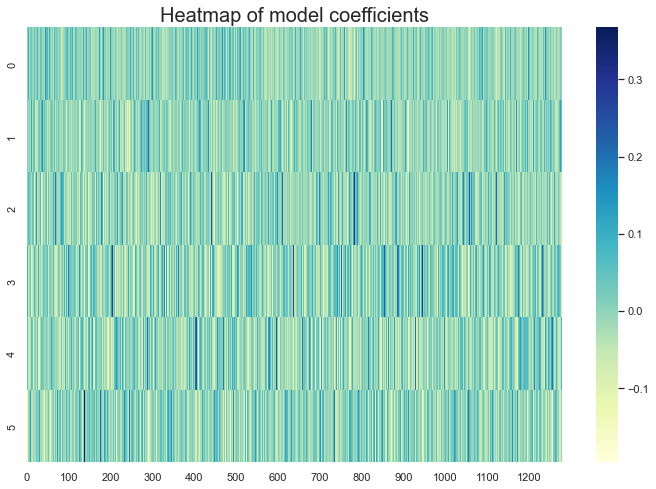

In [13]:
# import command
import seaborn as sns; 
sns.set_theme()

#plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(logreg_coef, cmap="YlGnBu", xticklabels=100)
plt.title("Heatmap of model coefficients", fontsize =20)
plt.show();

In [14]:
# top 5 largest coefficents per category 

print("bike top 5 coefficients:",np.sort(logreg_coef[0])[-5:])
print("car top 5 coefficients:",np.sort(logreg_coef[1])[-5:])
print("motorcycle top 5 coefficients:",np.sort(logreg_coef[2])[-5:])
print("other top 5 coefficients:",np.sort(logreg_coef[3])[-5:])
print("truck top 5 coefficients:",np.sort(logreg_coef[4])[-5:])
print("van top 5 coefficients:",np.sort(logreg_coef[5])[-5:])

bike top 5 coefficients: [0.14682222 0.14710678 0.14723553 0.14824021 0.15638208]
car top 5 coefficients: [0.1853946  0.19254716 0.19734542 0.20233234 0.20912714]
motorcycle top 5 coefficients: [0.21117632 0.21170629 0.24518635 0.24741232 0.29658568]
other top 5 coefficients: [0.22466433 0.26165934 0.26373138 0.27441202 0.30210781]
truck top 5 coefficients: [0.22583538 0.2357463  0.23875249 0.25237313 0.36755602]
van top 5 coefficients: [0.18906537 0.19380862 0.21389537 0.28485595 0.34474867]


In [15]:
# indices of top 5 largest coefficents per category 
import heapq

print("bike top 5 indeces:",heapq.nlargest(5, range(len(logreg_coef[0])), logreg_coef[0].take))
print("car top 5 indeces:", heapq.nlargest(5, range(len(logreg_coef[1])), logreg_coef[1].take))
print("motorcycle top 5 indeces:", heapq.nlargest(5, range(len(logreg_coef[2])), logreg_coef[2].take))
print("other top 5 indeces:", heapq.nlargest(5, range(len(logreg_coef[3])), logreg_coef[3].take))
print("truck top 5 indeces:",heapq.nlargest(5, range(len(logreg_coef[4])), logreg_coef[4].take))
print("van top 5 indeces:",heapq.nlargest(5, range(len(logreg_coef[5])), logreg_coef[5].take))

bike top 5 indeces: [999, 804, 1239, 148, 44]
car top 5 indeces: [930, 291, 681, 871, 1252]
motorcycle top 5 indeces: [783, 441, 1058, 787, 1122]
other top 5 indeces: [645, 945, 205, 637, 854]
truck top 5 indeces: [794, 405, 335, 596, 139]
van top 5 indeces: [138, 576, 176, 1055, 245]


_Observation: Comparing with the top 5 indeces from task one, there are four identical indeces:_

* _bike: index 148_
* _car: index 291_
* _motorcycle: index 1122_
* _truck: index 335_

_Otherwise, the observations are not consistent._


## Task 3: L2 regularization

Set an “l2” regularization and tune the regularization strength parameter of the model with cross-validated grid-search.

In [16]:
# import commands
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [17]:
# Create pipeline
pipe_lib = Pipeline([("scaler", StandardScaler()),
        ("logreg", LogisticRegression(multi_class="ovr", solver="liblinear")),])

In [18]:
# Create cross-validation object
grid = {"logreg__C": np.logspace(-4, 4, num=10)}

# Search of parameters, using 5 fold cross validation
grid_cv = GridSearchCV(pipe_lib, grid, cv=5, return_train_score=True, verbose=1)

In [19]:
grid

{'logreg__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
        3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
        1.29154967e+03, 1.00000000e+04])}

In [20]:
# merge test and validation dataset for hyperparameter tunning
X = np.append(tr_features, vl_features, axis=0)
y = np.append(tr_batch_labels, vl_batch_labels, axis=0)
print(X.shape, y.shape)

(419, 1280) (419,)


In [21]:
# Fit estimator
grid_cv.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(multi_class='ovr',
                                                           solver='liblinear'))]),
             param_grid={'logreg__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             return_train_score=True, verbose=1)

In [22]:
print("The optimal value for C is : {:}".format(grid_cv.best_params_))

The optimal value for C is : {'logreg__C': 0.046415888336127774}


__Concepts:__

C is an regularization parameter:_ __C = 1/λ__. _The parameter C makes a tradeoff between the two possibility of increasing the complexity of a model or keeping it low._
* _If C is very high, the weights of the parameters are given great value, so the complexity is increased (overfitting). High values for C lower the strength of the regularization, so that the model can increase its complexity._
* _If, on the other hand, C is lowered, the strength of the regularization is increased, which leads to simpler models. The model then tends to underfit._

## Task 4: Result table
Report the result of cross-validated grid-search as a dataframe and interpret the result. In particular, briefly explain what are the mean_train_score, mean_test_score, std_train_score and std_test_score:
* How are they obtained?
* What do they measure?

In [23]:
# Get the result keys
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [24]:
# Visualize the results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print a few interesting columns
cols = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "param_logreg__C",
]
cv_results[cols].sort_values("mean_test_score", ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C
3,0.906971,0.024131,1.000000,0.000000,0.046416
4,0.906971,0.024131,1.000000,0.000000,0.359381
5,0.904561,0.022485,1.000000,0.000000,2.782559
6,0.902180,0.025312,1.000000,0.000000,21.544347
7,0.902180,0.025312,1.000000,0.000000,166.810054
2,0.899771,0.024473,0.994629,0.002236,0.005995
1,0.897390,0.016053,0.963001,0.005566,0.000774
8,0.892656,0.028999,1.000000,0.000000,1291.549665
9,0.892628,0.027050,1.000000,0.000000,10000.0
0,0.878313,0.022930,0.927804,0.006652,0.0001


In [25]:
# 
grid_cv.best_score_

0.9069707401032702

__Concepts:__

__Grid search__ is a method for optimizing hyperparameters. It involves searching for the best combination of hyperparameter values to improve the performance of a model. Using k-fold cross-validation in combination with grid search improves the performance of a machine learning model by tuning the model hyperparameters.


In __k-fold cross-validation__ "k" stands for the number of folds the training data is divided into. K is an arbitrary number.  First, we divide the data into K folds. Of the K folds, k-1 folds are used for training and the kth fold (=the proportion 1/𝑘 of the data) is used for validating the model. The algorithm is trained and validated k times, each time using a new set as the test set, while the remaining sets are used for training. 


In grid search, the algorithm takes one combination of hyperparameters at a time. Then it trains the model with these hyperparameter values and evaluates it by k-fold cross-validation. It stores the __performance estimates__. Then it takes another combination of hyperparameters and does the same. From all the performance estimates, it selects the combination of hyperparameters that gives the best performance values. There are two performance values (or accuracies) for each combination: the mean_train_score and mean_test_score entries contain the mean scores on the train and validation sets for each combination of hyperparameters. The ``mean_test_score`` is  the mean score of the validation step for each fold. The ``mean_train_score`` is  the mean score of the training step for each fold. The ``mean_test_score`` is used to select the hyperparameter. It is the score of best_estimator on the left out data, thus the validation data.  Another performance estimate is the standard deviation. The ``std_train_score``or ``std_test_score`` measures the erorr band of the accuracy values.

Assuming I have a __model with cv=5__, the model will split the data into 5 parts, and there are 5 different folds to arrange these parts. Each of the 5 parts will have k-1 ones to train the model (thus 4) and 1 to evaluate the model. The data ratio of the train set to validation set is 4: 1. Hence, I will get 5 estimations of performance using the same data. The model evaluates the different combinations of hyperparameters during each fold and select the combination that performs the best in average across all folds. This is then the ``mean_train_score`` resp. ``mean_test_score``. If a have 10 candidates for the hyperparameter, then I will get 10 ``mean_train_score`` and 10 ``mean_test_score`` for each of the 10 candidates. In total there will be 50 fits.

## Task 5: Compare results
Plot the training and validation curves:
* Compare the accuracies to the non-regularized model above.
* Do the curves indicate overfitting?

In [26]:
# Compare accuracies
print("Test accuracy without regularization: {:.2f}%".format(100 * logreg.score(te_features, te_batch_labels)))
print("Test accuracy with regularization: {:.2f}%".format(100 * grid_cv.score(te_features, te_batch_labels)))

Test accuracy without regularization: 96.00%
Test accuracy with regularization: 94.00%


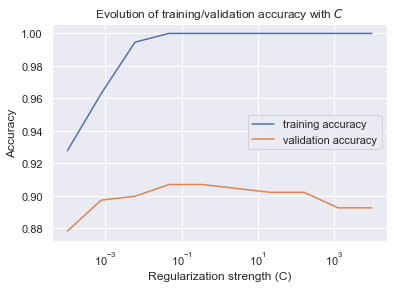

In [27]:
# Plot training/validation accuracy curves
plt.semilogx(
    cv_results["param_logreg__C"],
    cv_results["mean_train_score"],
    label="training accuracy",
)
plt.semilogx(
    cv_results["param_logreg__C"],
    cv_results["mean_test_score"],
    label="validation accuracy",
)
plt.xlabel("Regularization strength (C)")
plt.ylabel("Accuracy")
plt.title("Evolution of training/validation accuracy with $C$")
plt.legend()
plt.show()

_Observation 1: With the test dataset, the accuracy of the regularized model is the same than the arrucarcy of the non-regularized model._ 

_Observation 2: The training curve of the regularized model shows an increase in accuracy till a regularization strength of about 10^-2, afterwards it stays flat. The accuracy curve of the validation data also increases at the beginning, but then reaches a plateau and decreases again, meaning that the model has stopped learning. The training accuracy reaches 100%, which means I've probably massively overfit._

## Task 6: Report & Matrix

Provide a classification report and visualize the confusion matrix of the test set.

In [28]:
from sklearn.metrics import classification_report

# Classification report
y_te_preds = grid_cv.predict(te_features)
print(classification_report(y_true=te_batch_labels, y_pred=y_te_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.92      1.00      0.96        11
         2.0       1.00      1.00      1.00         9
         3.0       0.86      1.00      0.92         6
         4.0       0.86      0.86      0.86         7
         5.0       1.00      0.60      0.75         5

    accuracy                           0.94        50
   macro avg       0.94      0.91      0.91        50
weighted avg       0.94      0.94      0.94        50



_Oberservation: The recall value is 1 for all categories except vans. The model only detected 80% of vans, but 100% of all the other categories._

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


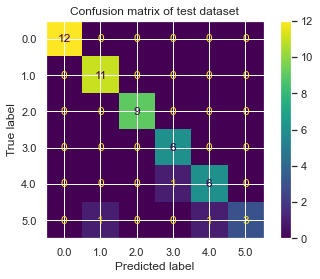

In [29]:
# import command
from sklearn.metrics import plot_confusion_matrix

#plot confusion matrix
plot_confusion_matrix(grid_cv,te_features, te_batch_labels,values_format='d' )
plt.title('Confusion matrix of test dataset')
plt.show()